In [237]:
from  SeisRefrac import *
%matplotlib inline

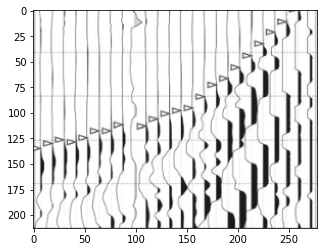

In [135]:
import imageio
image = imageio.imread('/Users/amalcolm/Dropbox/CURRENTCOURSES/ES3170/2023/LectureNotes/Seismic/Glac_Dat2.png')
imtosave=image[:,:,:3]#.sum(axis=2)
plt.imshow(imtosave)
np.savez('Glac_Dat2.npz',image=imtosave)

In [136]:
dat2=np.load('Glac_Dat2.npz')
dat2=dat2['image']
dat1=np.load('Glac_Dat1.npz')
dat1=dat1['image']

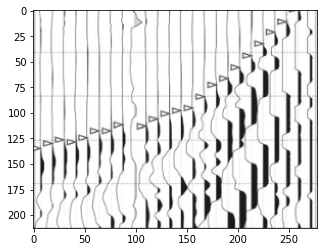

In [137]:
plt.imshow(dat2)

# Interpretation and data acquisition strategies of seismic refraction data

In this notebook, we will use synthetic seismic data to examine the impact of survey parameters on the expected seismic data.

## 1 Source 

In an ideal case, the source wavelet would be an impulse (ie. an instantaneous spike). However, in reality, the source energy is spread in space and in time as we've talked a bit about in class. The source wavelet used for these examples is shown below. So instead of seeing an impulsive arrival at a particular time, you will see this wavelet delayed by the traveltime.

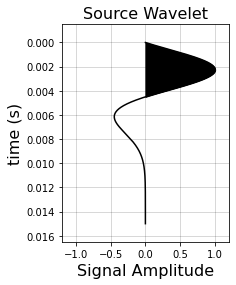

<AxesSubplot:title={'center':'Source Wavelet'}, xlabel='Signal Amplitude', ylabel='time (s)'>

In [2]:
plotWavelet()

## 2 Data

Below, we show 3 plots:
- **left**: expected arrival times for the direct, refracted waves and reflection from the first layer
- **center**: clean data - the wavelet arriving at the expected arrival time. Each line represents what would be recorded by an ideal geophone.
- **right**: noisy data - clean data + random noise. 

The model used is based on that in the previous part of the lab: 
- v1 = 1400 m/s
- v2 = 2400 m/s
- v3 = 4000 m/s
- z1 = 4m (depth to layer 1)
- z2 = 15m (depth to layer 2)

In [3]:
v=[1400.,2400.,4000.]
z=[4.,15.]
makeinteract3diagrams(v,z)

interactive(children=(IntSlider(value=4, description='x0', max=10), IntSlider(value=4, description='dx', max=2…

## 3a Setup for the seismic refraction survey

Consider a shot gather for seismic refraction survey, which means we have one shot (source), and multiple receivers (12). Shot location is fixed at x=0. There are two survey parameters: 

- x0: offset between shot and the first geophone
- dx: spacing between two consecutive geophones

In the widget below you can alter x0 or dx to change your survey setup. Run the next cell then try to change x0 and dx in the cell below that. Note that the next two cells are designed to help you visualize the survey layout. The x0 and dx parameter adjustment sliders here are not linked to the widget at the end of this notebook.

In [4]:
makeinteractSeisRefracSurvey()

interactive(children=(IntSlider(value=0, description='x0', max=10), IntSlider(value=8, description='dx', max=1…

## 3b Interpretation of seismic refraction data

Assume that you have seismic refraction data. The structure of the earth is unknown and you may want to obtain useful information about the subsurface. We will assume that the subsurface in the survey area has a three-layer structure and that the velocities increase with depth. 
Thus, there can be four unknowns:

- v1: velocity of the first layer (m/s)
- v2: velocity of the second layer (m/s)
- v3: velocity of the third layer (m/s)
- z1: depth of the first layer (m)
- z2: depth of the second layer (m)

Based on the above information, we may expect to have up to four arrivals at a geophone, related to 

- Direct
- Reflected: interface 1
- Refraction: interface 1
- Refraction: interface 2

The widget below will allow you to estimate the layer depths and velocities. The parameters for the widget are:

- x0: offset between shot and the first geophone
- dx: spacing between two consecutive geophones
- Fit: checking this activates fittting function (if you click this a red line will show up)
- tI: intercept time for a line function (s)
- v: inverse slope of the line function (m/s; which can be velocity of either direct and critically refracted wave)

### Run the widget below and find useful subsurface information!

6.92820323028
16.9412778902


In [233]:
def plotWiggleGlacTX(datset,tI=0.0, v=1000.0,  ax=None):
   # print(v)
    t = np.arange(0,10,.1)
    xmax=11.6
    x = np.arange(0,xmax,.5)


    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(7, 8))

    if datset==1:
        dat1=np.load('Glac_Dat1.npz')
        dat=dat1['image']
        temp = tI + 1./v*x
    
    elif datset==2:    
        dat2=np.load('Glac_Dat2.npz')
        dat=dat2['image']
        temp = tI - 1./v*(x-xmax)
        
    else:
        print("datset must be specified and must be either 1 or 2")
        return


    plt.imshow(dat,extent=[-.20,11.5,10.,0],aspect='auto')
#    wiggleVarx(data_convolved.T, x=x, sampr=dt, lwidth=1., scale=0.2, ax=ax)
    
    #print(temp)
    ax.plot(x, 1000.*temp, 'r', lw=2)
    if datset==2:
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        #ax.invert_xaxis()
    ax.set_ylim(10, -1)
    #ax.invert_yaxis()
    #ax.set_xlim(-1., 130)
    ax.set_xlabel("Offset (m)",fontsize=16)
    ax.set_ylabel("Time (s)",fontsize=16)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.tick_top()
    return ax

In [234]:
def showWiggleGlacTX(datset=1, tI=0.0, v=1000., ax=None, noise=False):
    ax = plotWiggleGlacTX(datset,tI, v, ax)
    plt.show()
    return True



In [235]:
def FitGlacialData(datset=1):
    Q = interactive(lambda tI, v: showWiggleGlacTX(datset,tI=tI/1000., v=v),
                 tI=FloatSlider(min=-1, max=5, step=0.2,value=0.0,layout=Layout(width='50%')),
                 v=FloatSlider(min=500, max=4500, step=20,value=2000.,layout=Layout(width='50%')))
    return Q



In [238]:
FitGlacialData(datset=1)

interactive(children=(FloatSlider(value=0.0, description='tI', layout=Layout(width='50%'), max=5.0, min=-1.0, …

In [231]:
tint=3.4e-3
v1=980.
v2=3760.
th=np.arcsin(1000./3700.)
h1=tint*v1/np.cos(th)/2.
print(h1)

1.7303976239460785


In [167]:
from IPython.html.widgets import  interactive, IntSlider, widget, FloatText, FloatSlider, Layout